In [18]:
# holoviz geopandas yml file from esm_lab/conda
import pandas as pd
from pprint import pprint as pp
from itertools import combinations
from pathlib import Path
import requests
import numpy as np
from bokeh.io import output_notebook, curdoc  # output_file
from bokeh.plotting import figure, show
from bokeh.sampledata.iris import flowers
from bokeh.sampledata.iris import flowers as iris_df
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper, Slider, Column, Select
from bokeh.models import CheckboxGroup, RadioGroup, Toggle, Button
from bokeh.models.widgets import Tabs, Panel
from bokeh.layouts import row, column, gridplot, widgetbox
from bokeh.palettes import Spectral6
from bokeh.themes import Theme
import yaml

# this line crates in-line plotting
output_notebook()

Loading BokehJS ...

In [16]:
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 300)
pd.set_option('display.expand_frame_repr', False)

In [4]:

def create_dir_save_file(dir_path: Path, url: str):
    """
    Check if the path exists and create it if it does not.
    Check if the file exists and download it if it does not.
    """
    if not dir_path.parents[0].exists():
        dir_path.parents[0].mkdir(parents=True)
        print(f'Directory Created: {dir_path.parents[0]}')
    else:
        print('Directory Exists')
        
    if not dir_path.exists():
        r = requests.get(url, allow_redirects=True)
        open(dir_path, 'wb').write(r.content)
        print(f'File Created: {dir_path.name}')
    else:
        print('File Exists')

In [5]:
# AAPL Stock
aapl_url = 'https://assets.datacamp.com/production/repositories/401/datasets/313eb985cce85923756a128e49d7260a24ce6469/aapl.csv'
# Automobile miles per gallon
auto_url = 'https://assets.datacamp.com/production/repositories/401/datasets/2a776ae9ef4afc3f3f3d396560288229e160b830/auto-mpg.csv'
# Gapminder
gap_url = 'https://assets.datacamp.com/production/repositories/401/datasets/09378cc53faec573bcb802dce03b01318108a880/gapminder_tidy.csv'
# Blood glucose levels
glucose_url = 'https://assets.datacamp.com/production/repositories/401/datasets/edcedae3825e0483a15987248f63f05a674244a6/glucose.csv'
# Female literacy and birth rate
female_url = 'https://assets.datacamp.com/production/repositories/401/datasets/5aae6591ddd4819dec17e562f206b7840a272151/literacy_birth_rate.csv'
# Olympic medals (100m sprint)
sprint_url = 'https://assets.datacamp.com/production/repositories/401/datasets/68b7a450b34d1a331d4ebfba22069ce87bb5625d/sprint.csv'
# State coordinates
state_url = 'https://github.com/trenton3983/DataCamp/blob/master/data/2020-03-15_interactive_data_visualization_with_bokeh/state_coordinates.xlsx?raw=true'

In [13]:
# had to convert state file to xls file and then change the path here by removing the xlsx extension
state_url = 'https://github.com/trenton3983/DataCamp/blob/master/data/2020-03-15_interactive_data_visualization_with_bokeh/state_coordinates.xls?raw=true'
data_dir = Path('/Users/james/Documents/Github/esm_lab/bokeh_tutorial/data/')
images_dir = Path('/Users/james/Documents/Github/esm_lab/bokeh_tutorial/images/')

datasets = [aapl_url, auto_url, gap_url, glucose_url, female_url, sprint_url, state_url]
data_paths = list()

for data in datasets:
    file_name = data.split('/')[-1].replace('?raw=true', '')
    data_path = data_dir / file_name
    create_dir_save_file(data_path, data)
    data_paths.append(data_path)
    

Directory Exists
File Exists
Directory Exists
File Exists
Directory Exists
File Exists
Directory Exists
File Exists
Directory Exists
File Exists
Directory Exists
File Exists
Directory Exists
File Exists


In [12]:
state_url

'https://github.com/trenton3983/DataCamp/blob/master/data/2020-03-15_interactive_data_visualization_with_bokeh/state_coordinates.xlsx?raw=true'

In [14]:
aapl = pd.read_csv(data_paths[0])
aapl.drop('Unnamed: 0', axis=1, inplace=True)
aapl['date'] = pd.to_datetime(aapl['date'])
auto = pd.read_csv(data_paths[1])
gap = pd.read_csv(data_paths[2])
gluc = pd.read_csv(data_paths[3])
gluc['datetime'] = pd.to_datetime(gluc['datetime'])
gluc.set_index('datetime', inplace=True, drop=True)
lit = pd.read_csv(data_paths[4])
lit = lit.iloc[0:162, :]
lit[['female literacy', 'fertility']] = lit[['female literacy', 'fertility']].astype('float')
lit.columns = [x.strip() for x in lit.columns]  # Country has a whitespace at the end
run = pd.read_csv(data_paths[5])
state_coor_dict = {state: pd.read_excel(data_paths[6], sheet_name=state) for state in ['az', 'co', 'nm', 'ut']} 

In [19]:
plot = figure(plot_height=300, plot_width=400, tools='pan,box_zoom,reset')
plot.circle([1, 2, 3, 4, 5], [8, 6, 5, 2, 3])
# output_file('circle.html')
show(plot)

In [20]:
plot = figure(plot_height=400, plot_width=400, )
plot.circle(x=10, y=[2, 5, 8, 12], size=[10, 20, 30, 40])
show(plot)

In [21]:
x = [1,2,3,4,5]
y = [8,6,5,2,3]
plot = figure(plot_height=300)
plot.line(x, y, line_width=3)
plot.circle(x, y, fill_color='white', size=10)
# output_file('basic.html')
show(plot)


In [22]:
plot = figure(plot_height=400, tools='box_select, lasso_select, reset')
plot.circle(iris_df.petal_length, iris_df.sepal_length, selection_color='red', nonselection_fill_alpha=0.2, nonselection_fill_color='grey')
show(plot)

In [23]:
np.random.seed(365)
a = np.random.random_sample(1000)
b = np.random.random_sample(1000)

In [24]:
hover = HoverTool(tooltips=None, mode='hline')
plot = figure(plot_height=400, tools=[hover, 'crosshair'])
# x and y are lists of random points
plot.circle(a, b, size=8, hover_color='magenta')
show(plot)

In [25]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
source = ColumnDataSource(iris_df)
mapper = CategoricalColorMapper( factors=['setosa', 'virginica', 'versicolor'], palette=['red', 'green', 'blue'])
plot = figure(plot_height=400, x_axis_label='petal_length', y_axis_label='sepal_length')
plot.circle('petal_length', 'sepal_length', size=10, source=source, color={'field': 'species', 'transform': mapper})
show(plot)

In [28]:

from bokeh.io import curdoc
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, Select
from bokeh.plotting import figure

In [29]:
N = 1000
source = ColumnDataSource(data={'x': np.random.random(N), 'y': np.random.random(N)})

# Create plots and widgets
plot = figure(plot_height=400, plot_width=400)
plot.circle(x='x', y='y', source=source)

menu = Select(options=['uniform', 'normal', 'lognormal'], value='uniform', title='Distribution')

# Add callback to widgets
def callback(attr, old, new):
    if menu.value == 'uniform':
        f=np.random.random
    elif menu.value == 'normal':
        f=np.random.normal
    else:
        f=np.random.lognormal
    source.data={'x': f(size=N), 'y': f(size=N)}

menu.on_change('value', callback)

# Arrange plots and widgets in layouts
layout = column(menu, plot)

curdoc().add_root(layout)

In [30]:
def bkapp(doc):
    
    N = 1000
    source = ColumnDataSource(data={'x': np.random.random(N), 'y': np.random.random(N)})

    # Create plots and widgets
    plot = figure(plot_height=400, plot_width=400)
    plot.circle(x='x', y='y', source=source)

    menu = Select(options=['uniform', 'normal', 'lognormal'], value='uniform', title='Distribution')

    # Add callback to widgets
    def callback(attr, old, new):
        if menu.value == 'uniform':
            f=np.random.random
        elif menu.value == 'normal':
            f=np.random.normal
        else:
            f=np.random.lognormal
        source.data={'x': f(size=N), 'y': f(size=N)}

    menu.on_change('value', callback)
    
    doc.add_root(column(menu, plot))

    doc.theme = Theme(json=yaml.load("""
        attrs:
            Figure:
                background_fill_color: "#DDDDDD"
                outline_line_color: white
                toolbar_location: above
                height: 400
                width: 400
            Grid:
                grid_line_dash: [6, 4]
                grid_line_color: white
    """, Loader=yaml.FullLoader))

In [31]:
show(bkapp)

bokeh.server.views.ws - ERROR - Refusing websocket connection from Origin 'http://localhost:8889';                       use --allow-websocket-origin=localhost:8889 or set BOKEH_ALLOW_WS_ORIGIN=localhost:8889 to permit this; currently we allow origins {'localhost:8888'}


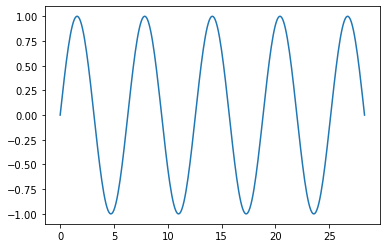

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets  import RectangleSelector

xdata = np.linspace(0,9*np.pi, num=301)
ydata = np.sin(xdata)

fig, ax = plt.subplots()
line, = ax.plot(xdata, ydata)


def line_select_callback(eclick, erelease):
    x1, y1 = eclick.xdata, eclick.ydata
    x2, y2 = erelease.xdata, erelease.ydata

    rect = plt.Rectangle( (min(x1,x2),min(y1,y2)), np.abs(x1-x2), np.abs(y1-y2) )
    ax.add_patch(rect)


rs = RectangleSelector(ax, line_select_callback,
                       drawtype='box', useblit=False, button=[1], 
                       minspanx=5, minspany=5, spancoords='pixels', 
                       interactive=True)

plt.show()

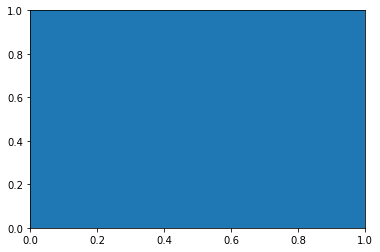

In [35]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

class Annotate(object):
    def __init__(self):
        self.ax = plt.gca()
        self.rect = Rectangle((0,0), 1, 1)
        self.x0 = None
        self.y0 = None
        self.x1 = None
        self.y1 = None
        self.ax.add_patch(self.rect)
        self.ax.figure.canvas.mpl_connect('button_press_event', self.on_press)
        self.ax.figure.canvas.mpl_connect('button_release_event', self.on_release)

    def on_press(self, event):
        print('press')
        self.x0 = event.xdata
        self.y0 = event.ydata

    def on_release(self, event):
        print('release')
        self.x1 = event.xdata
        self.y1 = event.ydata
        self.rect.set_width(self.x1 - self.x0)
        self.rect.set_height(self.y1 - self.y0)
        self.rect.set_xy((self.x0, self.y0))
        self.ax.figure.canvas.draw()

a = Annotate()
plt.show()